#**Name: Sachet Utekar**

##**Infopillar Task 1: Housing Prices Prediction Project**

##**Project idea – The dataset has house prices of the Boston residual areas.**
The expense of the house varies according to various factors like crime rate, number of rooms, etc.

##**Dataset: https://bit.ly/3uU4dtg** 

##**Importing Necessary Libraries & Taking Care of Warnings**

In [110]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##**Importing the Dataset**

In [111]:
dataset = pd.read_csv('/content/boston.csv')
dataset.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [112]:
print(dataset.keys()) #printing the index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'],
      dtype='object')


##**Checking the missing values**

In [113]:
dataset.isnull().sum() 
#Before importing the dataset, I have sanitized the dataset.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

##**Implementing Seaborn plots**

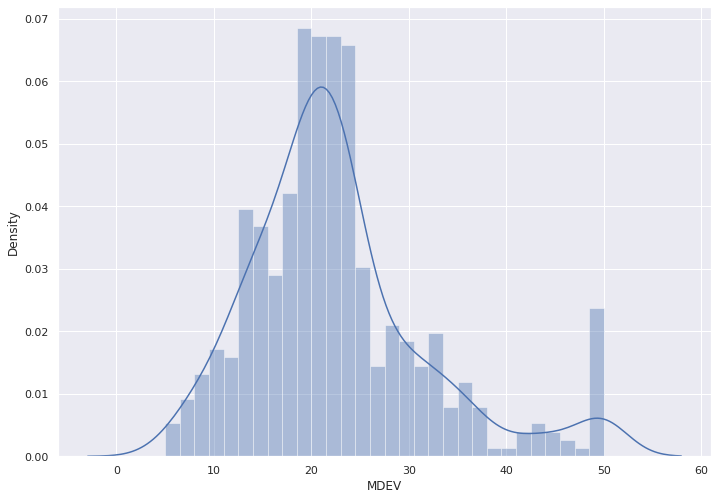

In [114]:
#creating distplot using seaborn Library
sb.set(rc = {'figure.figsize':(11.7,8.27)})
sb.distplot(dataset['MDEV'], bins = 30)
plt.show()

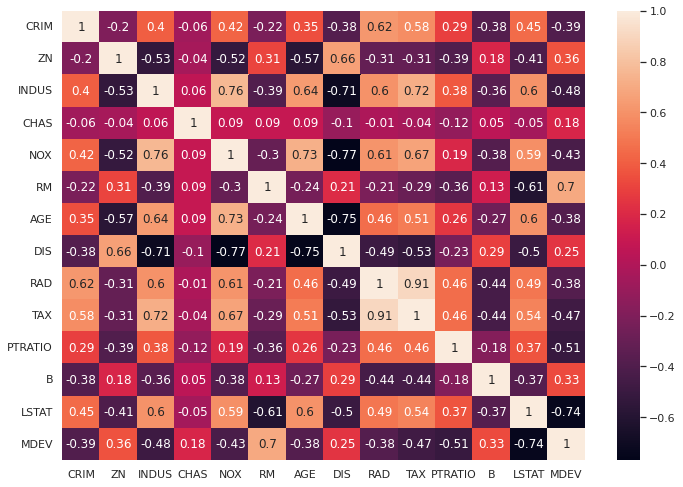

In [115]:
#creating heatmap using seaborn library
correlation_matrix = dataset.corr().round(2)

# annot = True to print the values inside the square
sb.heatmap(data = correlation_matrix, annot = True);

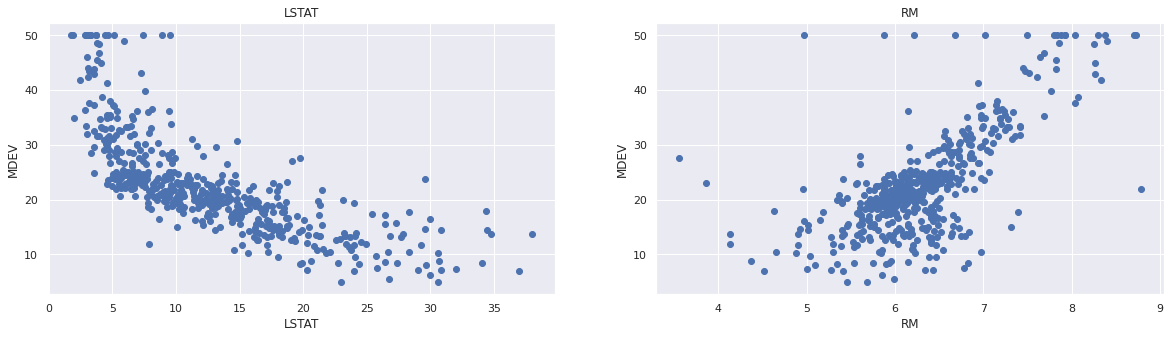

In [116]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = dataset['MDEV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MDEV')

In [117]:
X = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
Y = dataset['MDEV']

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [120]:
Y_pred = reg.predict(X_train)

In [121]:
from sklearn.metrics import r2_score

In [122]:
import sklearn.metrics as metrics

In [128]:
print('R^2:', metrics.r2_score(Y_train, Y_pred))
#r2 = metrics.r2_score(Y_train, Y_pred)
#print(r2)

R^2: 0.9601215158754606


In [ ]:
#print('Adjusted R^2:', 1 - (1-metrics.r2_score(Y_train, Y_pred) * len(Y_train) - X_train.shape[1]-1))
#print(1 - (1-r2 * (len(Y_train) - 1/(len(Y_train) - X_train.shape[0] - 1))))

##**Model Evaluation**

In [125]:
# model evaluation for training set

rmse = (np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

print("The model performance(RMSE):")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('\n')

mse = (metrics.mean_squared_error(Y_train, Y_pred))

print("The model performance(MSE):")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

mae = (metrics.mean_absolute_error(Y_train, Y_pred))

print("The model performance(MAE):")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

The model performance(RMSE):
--------------------------------------
RMSE is 1.8508456128681479


The model performance(MSE):
--------------------------------------
MSE is 3.4256294826732696


The model performance(MAE):
--------------------------------------
MAE is 1.2366608910891086




##**Data Visualisation**

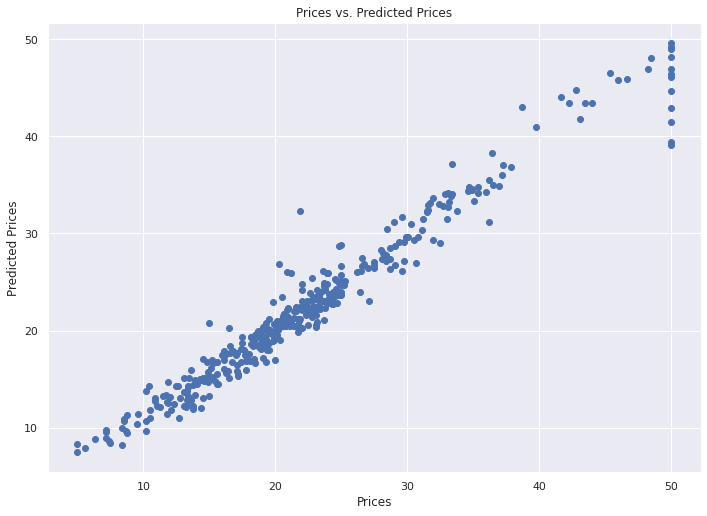

In [126]:
plt.scatter(Y_train, Y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs. Predicted Prices')
plt.show()

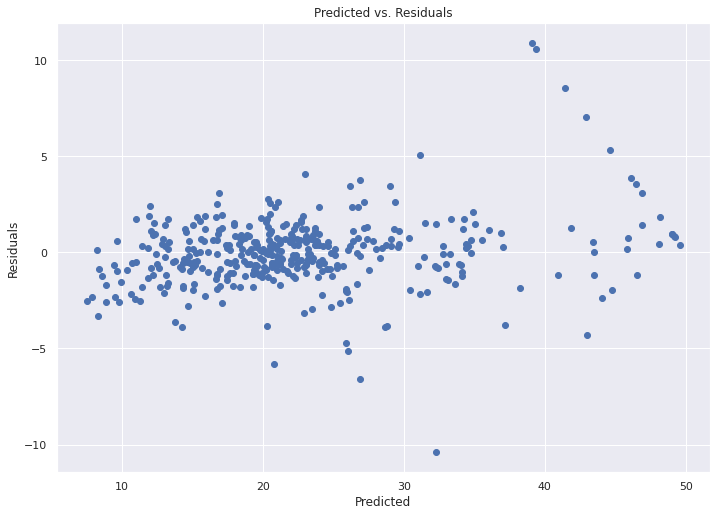

In [127]:
plt.scatter(Y_pred, Y_train - Y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title("Predicted vs. Residuals")
plt.show()

##**Results:** 
1. Random Forest Regressor works best for this dataset.
2. R2 score is 96% accurate on this dataset.